# Задание 7

In [24]:
import numpy as np
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
from typing import Callable
from functools import lru_cache
import pandas as pd
from random import uniform as rnd
import scipy.integrate as integrate
from scipy.misc import derivative

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Вариант 10
#### $y'(x) = -3y(x) + y^2(x);~y(0) = 1;~h=0.1;~N=10$

In [61]:
def initial_function(val: float) -> float:
    return -3 * val + val**2

### Общее решение дифференциального уравнения
#### $y(x) = \displaystyle\frac{3}{e^{c_1 + 3x}+1}$
### Решение задачи Коши с начальными данными $y(0)=1$
#### $y(x) = \displaystyle\frac{3}{2e^{3x}+1}$

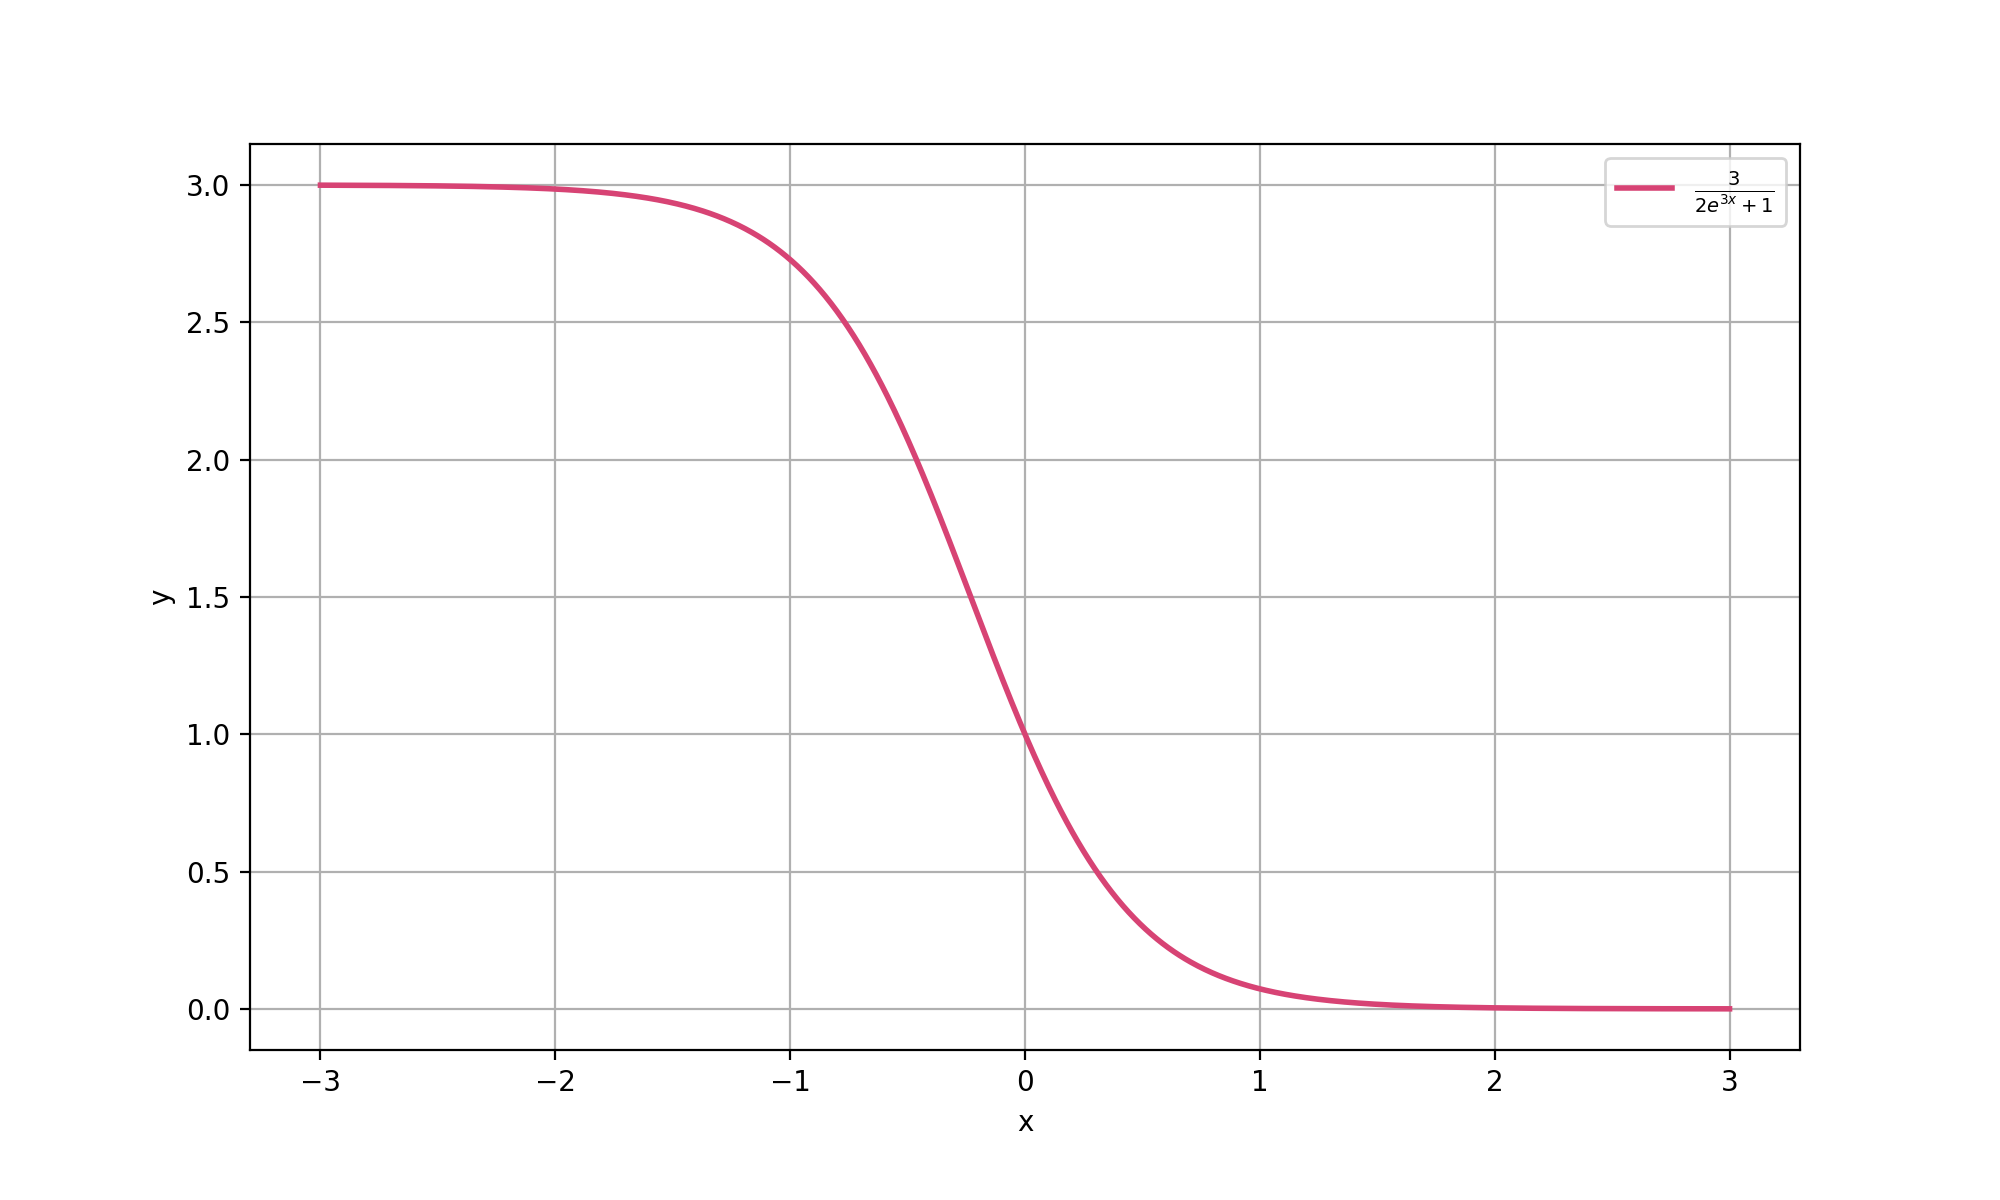

In [15]:
# Решение задачи Коши
expected_solution = lambda x: 3 / (2 * np.exp(3*x) + 1)
# Вывод графика
X = np.linspace(-3, 3, 1000)
Y = [expected_solution(x) for x in X]
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax.plot(X, Y, color='#d74374', linewidth=2, label=r'$\frac{3}{2e^{3x}+1}$')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

### 1) Найти точное решение. Вывести на печать таблицу значений точного решения в равноотстоящих с шагом $h$ точках $x_k = x_0+kh$, где $k= ‒2, ‒1, 0,\dots, N$; здесь $N$ и $h$ − параметры задачи.

In [56]:
h = 0.1
N = 10
x0 = 0
Xk = [x0 + k*h for k in range(-2, N+1)]
XYk = np.array([[x0 + k*h, str(expected_solution(x0 + k*h))] for k in range(-2, N+1)])
table_of_values_for_xk = pd.DataFrame(XYk, index=[f'X{i}' for i in range(-2, N+1)], columns=['Xk', 'Y(Xk)'])
table_of_values_for_xk

,Xk,Y(Xk)
X-2,-0.2,1.4301900821641191
X-1,-0.1,1.2088797335486299
X0,0.0,1.0
X1,0.1,0.8108726968008725
X2,0.2,0.6459617827252189
X3,0.30000000000000004,0.5068247138764593
X4,0.4,0.39265813856961007
X5,0.5,0.30110269405035506
X6,0.6000000000000001,0.22901995995206542
X7,0.7000000000000001,0.17308684403068364


### 2) Методом разложения в ряд Тейлора (можно ограничиться пятью ненулевыми слагаемыми) найти и вывести на печать значения приближённого решения в точках $x_k = x_0+kh$, где $k= ‒2, ‒1, 0,\dots, N$.
### 3) Во всех точках $x_k= x_0+kh$, где $k= ‒2, ‒1, 0,\dots, N$ вывести на печать значения абсолютной погрешности метода разложения в ряд Тейлора.
#### Вычисление $\displaystyle\sum\limits_{i=0}^5 \frac{y^{(i)}(x_0)}{i!}(x-x_0)^i$
#### $y(0) = 1$
#### $y'(0) = -3y + y^2 \bigg|_{x=0} = -2$
#### $y^{(2)}(0) = (2y - 3)y' \bigg|_{x=0} = 2$
#### $y^{(3)}(0) = (2y - 3)y'' + 2{y'}^2 \bigg|_{x=0} = 6$
#### $y^{(4)}(0) = (2y - 3)y^{(3)} + 6y'y'' \bigg|_{x=0} = -30$
#### $y^{(5)}(0) = (2y - 3)y^{(4)} + 6{y''}^2 + 8y^{(3)}y' \bigg|_{x=0} = -42$

In [57]:
# y^(i)
derivatives = [1, -2, 2, 6, -30, -42]
#sum
@lru_cache(maxsize=30)
def factorial(n: int) -> int:
    if n == 1 or n == 0:
        return 1
    return n * factorial(n-1)
taylor_series = lambda x: np.sum([derivatives[i] / factorial(i) * (x - x0)**i for i in range(6)])
# вывод
XTk = np.array([[x0 + k*h, expected_solution(x0 + k*h), taylor_series(x0 + k*h), str(abs(taylor_series(x0 + k*h) - expected_solution(x0 + k*h)))] for k in range(-2, N+1)])
table_of_values_for_taylor_of_k = pd.DataFrame(XTk, index=[f'X{i}' for i in range(-2, N+1)], columns=['Xk', 'Y(Xk)', 'T(Xk)', 'Error'])
table_of_values_for_taylor_of_k

,Xk,Y(Xk),T(Xk),Error
X-2,-0.2,1.4301900821641191,1.4301119999999998,7.808216411930857e-05
X-1,-0.1,1.2088797335486299,1.2088785000000002,1.2335486296866094e-06
X0,0.0,1.0,1.0,0.0
X1,0.1,0.8108726968008725,0.8108715,1.1968008725160573e-06
X2,0.2,0.6459617827252189,0.645888,7.378272521885165e-05
X3,0.30000000000000004,0.5068247138764593,0.5060244999999999,0.0008002138764594546
X4,0.4,0.39265813856961007,0.388416,0.004242138569610088
X5,0.5,0.30110269405035506,0.2859375,0.015165194050355046
X6,0.6000000000000001,0.22901995995206542,0.1867839999999999,0.04223595995206553
X7,0.7000000000000001,0.17308684403068364,0.07405049999999994,0.0990363440306837


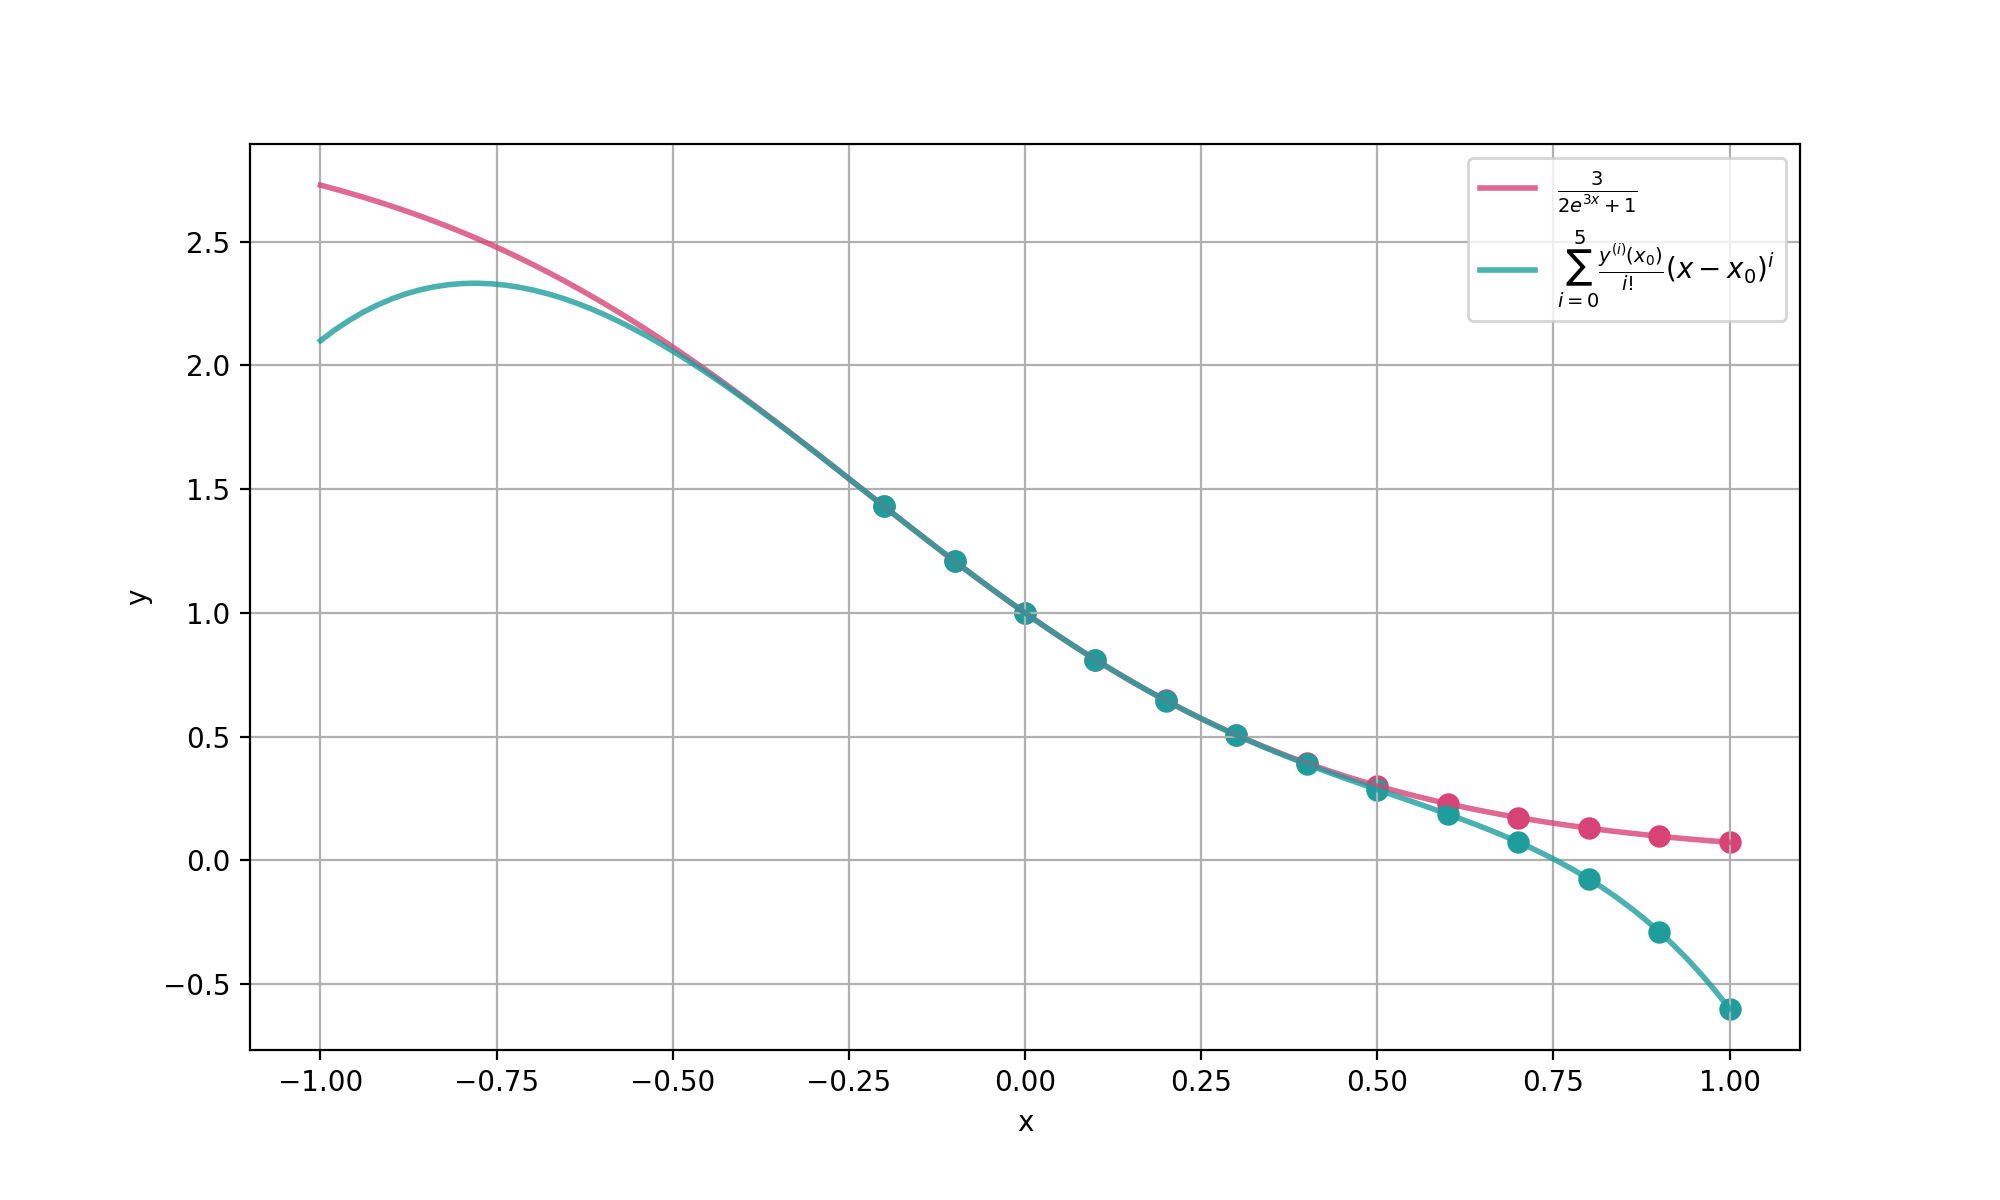

In [60]:
# вывод графика
X = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
ax.plot(X, [expected_solution(x) for x in X], color='#d74374', alpha=0.8, linewidth=2, label=r'$\frac{3}{2e^{3x}+1}$')
ax.plot(X, [taylor_series(x) for x in X], color='#1e9d9c', alpha=0.8, linewidth=2, label=r'$\sum_{i=0}^5 \frac{y^{(i)}(x_0)}{i!}(x-x_0)^i$')
ax.scatter(Xk, [expected_solution(x) for x in Xk], color='#d74374', s=50)
ax.scatter(Xk, [taylor_series(x) for x in Xk], color='#1e9d9c', s=50)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid()

plt.show()

### 4) Вывести на печать значения приближённого решения, полученного экстраполяционным методом Адамса 4-го порядка в точках $x_k = x_0+kh$, где $k=3,4,\dots,N$.

### 5) Методом Рунге-Кутты 4-го порядка найти и вывести на печать значения приближённого решения в точках $x_k = x_0+kh$, где $k=1,2,\dots,N$.


In [69]:
# y_k для метода Рунге-Кутта
Yk = [1]
for k in range(1, N+1):
    y = Yk[-1]
    k1 = h * initial_function(y)
    k2 = h * initial_function(y + k1 / 2)
    k3 = h * initial_function(y + k2 / 2)
    k4 = h * initial_function(y + k3)
    Yk.append(y + (k1 + 2 * k2 + 2  *k3 + k4) / 6)
# вывод результатов
Xk = [x0 + k*h for k in range(1, N+1)]
XYk = np.array([[Xk[i-1], Yk[i], expected_solution(Xk[i-1]), str(abs(expected_solution(Xk[i-1]) - Yk[i]))] for i in range(1, N+1)])
table_of_values_for_runge = pd.DataFrame(XYk, index=[f'X{i}' for i in range(1, N+1)], columns=['Xk', 'Runge-Kutta for Xk', 'Y(Xk)', 'Error'])
table_of_values_for_runge

,Xk,Runge-Kutta for Xk,Y(Xk),Error
X1,0.1,0.8108747873861025,0.8108726968008725,2.090585230041242e-06
X2,0.2,0.6459663921763152,0.6459617827252189,4.609451096371231e-06
X3,0.30000000000000004,0.5068319261723887,0.5068247138764593,7.212295929370782e-06
X4,0.4,0.39266763361162166,0.39265813856961007,9.495042011586907e-06
X5,0.5,0.30111384469352265,0.30110269405035506,1.1150643167590069e-05
X6,0.6000000000000001,0.2290320053462646,0.22901995995206542,1.2045394199189374e-05
X7,0.7000000000000001,0.1730990523972184,0.17308684403068364,1.220836653476054e-05
X8,0.8,0.13018421500755184,0.1301724412133385,1.1773794213326694e-05
X9,0.9,0.09754187790574805,0.09753096002150209,1.0917884245953413e-05
X10,1.0,0.0728765054709977,0.07286669303778961,9.812433208078453e-06


### 6) Найти и вывести на печать значения приближенных решений исходной задачи, полученных методом Эйлера и его модификциями в точках $x_k = x_0+kh$, где $k=1,2,\dots,N$.

In [72]:
Yk = [1]
for i in range(1, N+1):
    Yk.append(Yk[-1] + h * initial_function(Yk[-1]))
Xk = [x0 + k*h for k in range(N+1)]
XYk = np.array([[Xk[i], Yk[i], expected_solution(Xk[i]), str(abs(expected_solution(Xk[i]) - Yk[i]))] for i in range(N+1)])
table_of_values_for_euler = pd.DataFrame(XYk, index=[f'X{i}' for i in range(N+1)], columns=['Xk', 'Euler for Xk', 'Y(Xk)', 'Error'])
table_of_values_for_euler

,Xk,Euler for Xk,Y(Xk),Error
X0,0.0,1,1.0,0.0
X1,0.1,0.8,0.8108726968008725,0.010872696800872439
X2,0.2,0.624,0.6459617827252189,0.02196178272521887
X3,0.30000000000000004,0.4757376,0.5068247138764593,0.03108711387645935
X4,0.4,0.355648946405376,0.39265813856961007,0.037009192164234095
X5,0.5,0.2616028797916886,0.30110269405035506,0.039499814258666444
X6,0.6000000000000001,0.18996562252571247,0.22901995995206542,0.03905433742635295
X7,0.7000000000000001,0.1365846295421569,0.17308684403068364,0.03650221448852675
X8,0.8,0.09747477678222664,0.1301724412133385,0.03269766443111187
X9,0.9,0.06918247695843315,0.09753096002150209,0.028348483063068947
